In [1]:
# Forecast the sales for 1 year for the furniture products category on the basis of the historical data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importing data
df = pd.read_excel(r"C:\Users\khatr\OneDrive\Desktop\MBA_time_series_pca_naive_bayes\Sample_Superstore.xls",header=0)

#Printing head
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
df.shape

(9994, 21)

In [3]:
df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [4]:
furniture = df[df["Category"] == "Furniture"]
furniture.shape

(2121, 21)

In [5]:
furniture.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [7]:
furniture['Order Date']=pd.to_datetime(furniture['Order Date'])
# for converting into date time

C:\Users\khatr\AppData\Local\Temp\ipykernel_14140\3318320253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture['Order Date']=pd.to_datetime(furniture['Order Date'])


In [8]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [9]:
furniture=furniture[['Order Date','Sales']]
furniture.shape

(2121, 2)

In [10]:
furniture

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


In [11]:
furniture = furniture.sort_values('Order Date',ascending=True)
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [12]:
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [13]:
furniture['Order Date'].value_counts()

2016-09-05    10
2016-12-25     9
2016-12-01     9
2017-11-19     9
2017-10-30     9
              ..
2015-11-26     1
2015-11-24     1
2015-11-22     1
2015-11-19     1
2017-12-30     1
Name: Order Date, Length: 889, dtype: int64

In [14]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.shape

(889, 2)

In [15]:
furniture.head(10)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [16]:
furniture = furniture.set_index('Order Date')

In [17]:
furniture.head(10)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470
2014-01-20,1413.510


In [18]:
y = furniture['Sales'].resample("M").mean()

In [19]:
print(y.shape)
y

(48,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
2017-01-31     397.602133
2017-02-28     528.179800
2

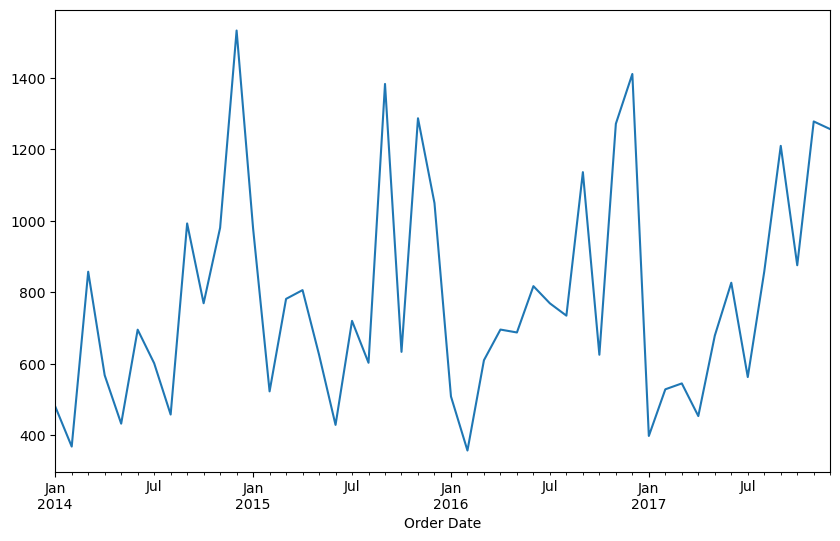

In [20]:
y.plot(figsize=(10,6))
plt.show()

In [21]:
train=y.loc[:'2016-12-31']
print(train.shape)
train

(36,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
Freq: M, Name: Sales, dtype: float64

In [22]:
test = y.loc['2017-01-31':]
print(test.shape)
test

(12,)


Order Date
2017-01-31     397.602133
2017-02-28     528.179800
2017-03-31     544.672240
2017-04-30     453.297905
2017-05-31     678.302328
2017-06-30     826.460291
2017-07-31     562.524857
2017-08-31     857.881889
2017-09-30    1209.508583
2017-10-31     875.362728
2017-11-30    1277.817759
2017-12-31    1256.298672
Freq: M, Name: Sales, dtype: float64

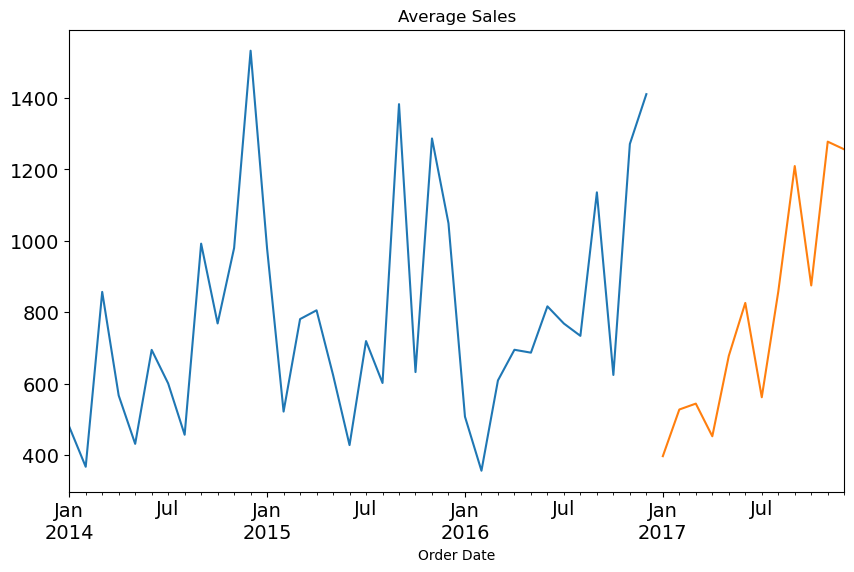

In [23]:
#plotting data
train.plot(figsize=(10,6),title='Average Sales',fontsize=14)
test.plot(figsize=(10,6),title='Average Sales',fontsize=14)
plt.show()

# Simple Exponential Smoothing Model

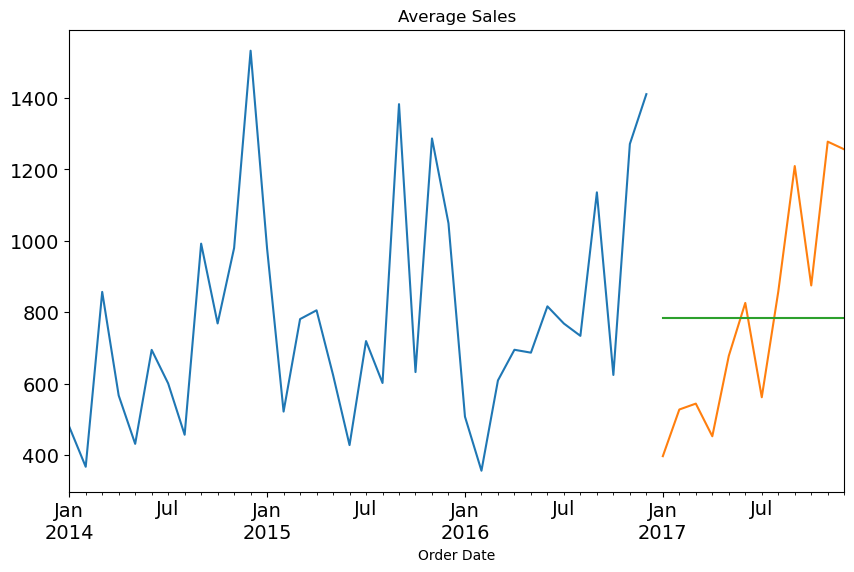

In [24]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.01)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [25]:
Exp_Smooth.SES

2017-01-31    784.196954
2017-02-28    784.196954
2017-03-31    784.196954
2017-04-30    784.196954
2017-05-31    784.196954
2017-06-30    784.196954
2017-07-31    784.196954
2017-08-31    784.196954
2017-09-30    784.196954
2017-10-31    784.196954
2017-11-30    784.196954
2017-12-31    784.196954
Freq: M, dtype: float64

In [26]:
#AIC is used to compare different models with same Algo but differrent data/parameter
#choose the model with lowest AIC value

fit1.aic

415.87664216026513

In [27]:
#RMSE is used to compare different models with same Algo but differrent data/parameter
#choose the model with lowest RMSE value

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Exp_Smooth.SES))
print(rmse)

303.4766834364632


# Holt Model

C:\Users\khatr\AppData\Local\Temp\ipykernel_14140\1765533302.py:7: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train).fit(smoothing_level=0.01,smoothing_slope = 0.25)


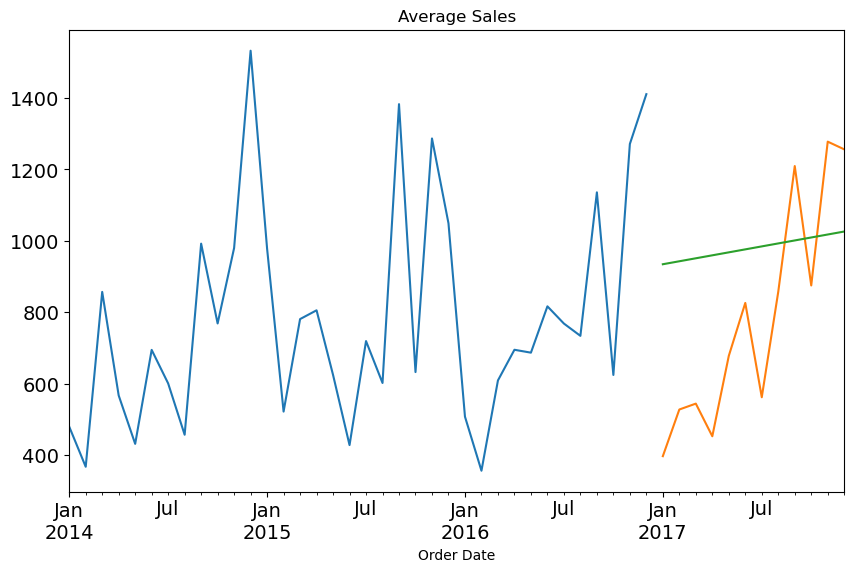

In [29]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing level=beta
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = Holt(train).fit(smoothing_level=0.01,smoothing_slope = 0.25)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [30]:

fit1.aic

427.95435484718445

In [30]:
Holt_df['Holt_linear']

2017-01-31     934.738385
2017-02-28     943.061497
2017-03-31     951.384609
2017-04-30     959.707721
2017-05-31     968.030833
2017-06-30     976.353945
2017-07-31     984.677058
2017-08-31     993.000170
2017-09-30    1001.323282
2017-10-31    1009.646394
2017-11-30    1017.969506
2017-12-31    1026.292618
Freq: M, dtype: float64

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_df['Holt_linear']))
print(rmse)

337.53830585170135


# Holt-Winter Model

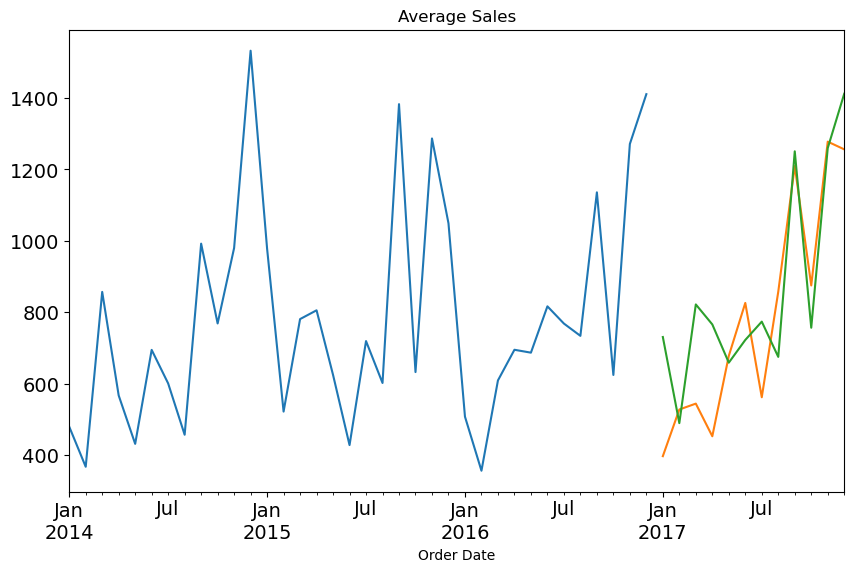

In [32]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()

#smoothing level=gama 
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp

fit1 = ExponentialSmoothing(train , seasonal_periods=12,
                           trend='add',
                           seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [33]:
Holt_Winter_df['Holt_Winter']

2017-01-31     731.080555
2017-02-28     490.110108
2017-03-31     822.264315
2017-04-30     766.312435
2017-05-31     659.268921
2017-06-30     722.830644
2017-07-31     774.110517
2017-08-31     675.451428
2017-09-30    1250.781645
2017-10-31     757.062332
2017-11-30    1259.641546
2017-12-31    1411.844696
Freq: M, dtype: float64

In [34]:
fit1.aic

388.12412743725395

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_Winter_df['Holt_Winter']))
print(rmse)

186.42843644581401


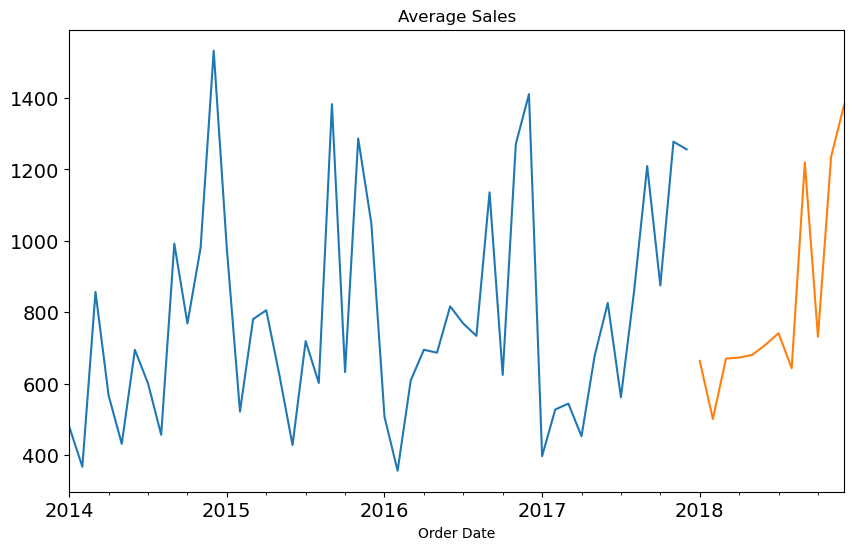

In [36]:
from statsmodels.tsa.api import ExponentialSmoothing

#seasonalperiods = gamma
fit1 = ExponentialSmoothing(y , seasonal_periods=12,
                           trend='add',
                           seasonal='add').fit()

#Y_predictions = fit1.predict(start=pd.to_datetime('2017-01-31'))
Y_predictions = fit1.forecast(steps=12)

y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [37]:
Y_predictions

2018-01-31     664.254635
2018-02-28     501.659126
2018-03-31     670.716966
2018-04-30     673.503938
2018-05-31     681.028232
2018-06-30     709.355616
2018-07-31     741.641193
2018-08-31     643.783643
2018-09-30    1219.184017
2018-10-31     731.763907
2018-11-30    1234.874816
2018-12-31    1382.094496
Freq: M, dtype: float64

In [39]:
Y_predictions.to_excel("TimeSeriesOutput.xls",index=True)

C:\Users\khatr\AppData\Local\Temp\ipykernel_14140\3137793192.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  Y_predictions.to_excel("TimeSeriesOutput.xls",index=True)
